# Lab 6.6.1 Ridge Regression


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale

#Loading Hitting and renaming. 
df = pd.read_csv("C:\\Users\\diteh\\Documents\\Biomedicinsk Teknologi\\3. semester\\Decision Support System\\Lab\\Hitters.csv", na_values='?')
df.index.name = 'Player'
df_clean = df.dropna().drop('Unnamed: 0', axis=1)
df_clean.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [2]:
df.info() #To see what type each parameter is. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB


In [3]:
# Creates dummies, which makes it into 0 or 1 according to the two possibles. 
dummies = pd.get_dummies(df_clean[['League', 'Division', 'NewLeague']])
y = df_clean.Salary

# Drop the column with the independent variable (Salary), and columns for the created dummy variables
X_ = df_clean.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Putting them bach together.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
AtBat          263 non-null float64
Hits           263 non-null float64
HmRun          263 non-null float64
Runs           263 non-null float64
RBI            263 non-null float64
Walks          263 non-null float64
Years          263 non-null float64
CAtBat         263 non-null float64
CHits          263 non-null float64
CHmRun         263 non-null float64
CRuns          263 non-null float64
CRBI           263 non-null float64
CWalks         263 non-null float64
PutOuts        263 non-null float64
Assists        263 non-null float64
Errors         263 non-null float64
League_N       263 non-null uint8
Division_W     263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: float64(16), uint8(3)
memory usage: 35.7 KB


In [4]:
X.head() 

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,,,,,,,,,,
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [5]:
# Creating a lot of alphaes to make the figure below.
# usign the lambdas as candidates for the real value of alpha (named lambda in theory)
alphas = 10**np.linspace(10,-2,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
    
print(len(coefs))
print(len(coefs[0]))

100
19


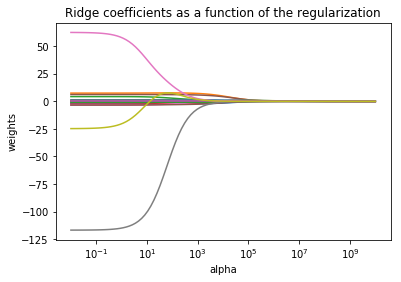

In [6]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

#Shows that Ridge coefficients gets larger when alpha decrease.

In [7]:
# Splitting data into training og test sets.  
np.random.seed(1)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.66)

In [8]:
#Preforming the Ridge Regression with alpha = 4 
ridge = Ridge( alpha=4)
ridge.fit(X_train, y_train)             
pred = ridge.predict(X_test)  
metrics.mean_squared_error(y_test, pred)
print(pd.Series(ridge.coef_, index=X.columns)) 
print(mean_squared_error(y_test, pred)) #MSE = 124548.34865038277

AtBat           -2.595021
Hits            10.094663
HmRun           -6.458553
Runs            -4.351079
RBI              4.599898
Walks            5.411648
Years           24.116344
CAtBat          -0.296129
CHits            0.832442
CHmRun           2.376864
CRuns            0.646324
CRBI            -0.277823
CWalks          -0.259738
PutOuts          0.428106
Assists          0.201701
Errors          -2.200019
League_N        68.096098
Division_W    -144.926776
NewLeague_N    -22.805780
dtype: float64
124548.34865038277


In [9]:
# preforming the Ridge Regression with alpha = 10^10
import math
ridge = Ridge( alpha=math.pow(10,10))
ridge.fit(X_train, y_train)            
pred = ridge.predict(X_test) 
metrics.mean_squared_error(y_test, pred)
print(pd.Series(ridge.coef_, index=X.columns)) 
print(mean_squared_error(y_test, pred)) #MSE = 190724.9 


AtBat          3.498733e-04
Hits           1.250728e-04
HmRun          1.764070e-05
Runs           6.653047e-05
RBI            7.938005e-05
Walks          5.731754e-05
Years          1.009509e-05
CAtBat         6.136181e-03
CHits          1.851103e-03
CHmRun         2.592312e-04
CRuns          9.478017e-04
CRBI           1.060198e-03
CWalks         6.649386e-04
PutOuts        7.889612e-04
Assists       -3.542988e-05
Errors         7.236307e-07
League_N      -1.436916e-07
Division_W    -6.166094e-07
NewLeague_N   -1.300110e-07
dtype: float64
165399.246732186


In [10]:
#Finding alpha by using CV
from sklearn.linear_model import RidgeCV 
np.random.seed(1)

ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.49770235643321137

In [11]:
# preforming Ridge regression with the found alpha - copy and paste the abow output. 
ridge_best = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge_best.fit(X_train, y_train)
result = ridge_best.predict(X_test)
metrics.mean_squared_error(y_test, result)
print(pd.Series(ridge_best.coef_, index=X.columns))  # many of the coefficients are very small, but none of them are zero
print(mean_squared_error(y_test, result)) #MSE = 122337.39431578679

AtBat            0.086521
Hits             1.539631
HmRun           -1.030896
Runs             1.145274
RBI              1.434906
Walks            2.186486
Years            3.120288
CAtBat           0.007130
CHits            0.050447
CHmRun           0.490414
CRuns            0.092540
CRBI             0.121534
CWalks           0.088486
PutOuts          0.338151
Assists         -0.183763
Errors          -0.013946
League_N        28.162723
Division_W    -131.851883
NewLeague_N      3.233190
dtype: float64
122337.39431578679


# Lab 6.6.2 The Lasso

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale

#Loading data set
df = pd.read_csv("C:\\Users\\diteh\\Documents\\Biomedicinsk Teknologi\\3. semester\\Decision Support System\\Lab\\Hitters.csv", na_values='?')
df.index.name = 'Player'
df_clean = df.dropna().drop('Unnamed: 0', axis=1)
df_clean.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [13]:
# Creates dummies, which makes it into 0 or 1 according to the two possibles. 
dummies = pd.get_dummies(df_clean[['League', 'Division', 'NewLeague']])
y = df_clean.Salary

# Drop the column with the independent variable (Salary), and columns for dummy variables
X_ = df_clean.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Putting them bach together.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,,,,,,,,,,
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [14]:
# Splitting the data set into training and test data 
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.66)

In [15]:
np.random.seed(1)
# Creating a range of alphas
alphas = 10**np.linspace(10,-2,100)

#Creating the lasso - for below picture. 
lasso = Lasso(normalize=True, max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

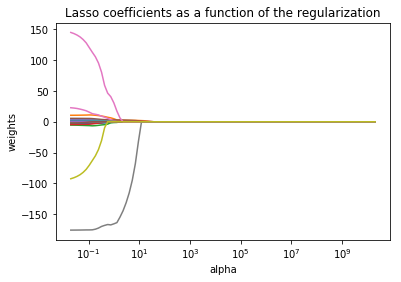

In [16]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [19]:
# Performing the Lasso. 
lassoCV = LassoCV(alphas=alphas, cv=10, max_iter=10000, normalize=True)
lassoCV.fit(X_train, y_train)
lassoCV.alpha_

# 3.511

3.5111917342151275

In [20]:
lasso.set_params(alpha=lassoCV.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

123263.50715748161

In [21]:
#Print coefficients
print(pd.Series(lasso.coef_.flatten(), index=X.columns)) 

AtBat            0.000000
Hits             2.464369
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks            2.449107
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun           0.443688
CRuns            0.000000
CRBI             0.445676
CWalks           0.000000
PutOuts          0.418831
Assists         -0.000000
Errors          -0.000000
League_N         0.000000
Division_W    -123.441840
NewLeague_N      0.000000
dtype: float64


In [22]:
# Cheking how many coefficients are different than zero. 
print(lasso.coef_!=0)

[False  True False False False  True False False False  True False  True
 False  True False False False  True False]
